In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import io

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# loading data
file_path="Resources/FoodAccess2015CensusTractAll.csv"
foodAccess_df=pd.read_csv(file_path, index_col=False)
foodAccess_df.head()

,CensusTract,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,6001400100,Alameda,1,2937,1314,0,2,0.000681,0,0,...,2161,142,456,9,4,165,117,0,0,2.416889
1,6001400200,Alameda,1,1974,856,0,70,0.035461,0,0,...,1659,33,147,0,4,131,151,57,6,1.682202
2,6001400300,Alameda,1,4865,2418,0,40,0.008222,0,0,...,3468,518,423,5,17,434,399,354,34,1.541934
3,6001400400,Alameda,1,3703,1779,0,33,0.008912,0,0,...,2628,456,278,6,14,321,332,159,9,1.400941
4,6001400500,Alameda,1,3517,1578,0,126,0.035826,0,0,...,1905,955,209,5,27,416,340,258,72,0.652844


In [3]:
#Create DataFrame
foodAccess_2015=pd.DataFrame(foodAccess_df)

In [4]:
#copy DataFrame
new_foodAccess_df=foodAccess_2015.copy().reset_index()
new_foodAccess_df.head()

,index,CensusTract,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,0,6001400100,Alameda,1,2937,1314,0,2,0.000681,0,...,2161,142,456,9,4,165,117,0,0,2.416889
1,1,6001400200,Alameda,1,1974,856,0,70,0.035461,0,...,1659,33,147,0,4,131,151,57,6,1.682202
2,2,6001400300,Alameda,1,4865,2418,0,40,0.008222,0,...,3468,518,423,5,17,434,399,354,34,1.541934
3,3,6001400400,Alameda,1,3703,1779,0,33,0.008912,0,...,2628,456,278,6,14,321,332,159,9,1.400941
4,4,6001400500,Alameda,1,3517,1578,0,126,0.035826,0,...,1905,955,209,5,27,416,340,258,72,0.652844


In [5]:
new_foodAccess_df.columns

Index(['index', 'CensusTract', 'County', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome',
       'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1',
       'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10',
       'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
       'lapophalf', 'lalowihalf', 'lawhitehalf', 'lablackhalf', 'laasianhalf',
       'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf',
       'lahunvhalf', 'lasnaphalf', 'lapop1', 'lalowi1', 'lawhite1', 'lablack1',
       'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 'lahisp1', 'lahunv1',
       'lasnap1', 'lapop10', 'lalowi10', 'lawhite10', 'lablack10', 'laasian10',
       'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10',
       'lasnap10', 'lapop20'

<IPython.core.display.Javascript object>


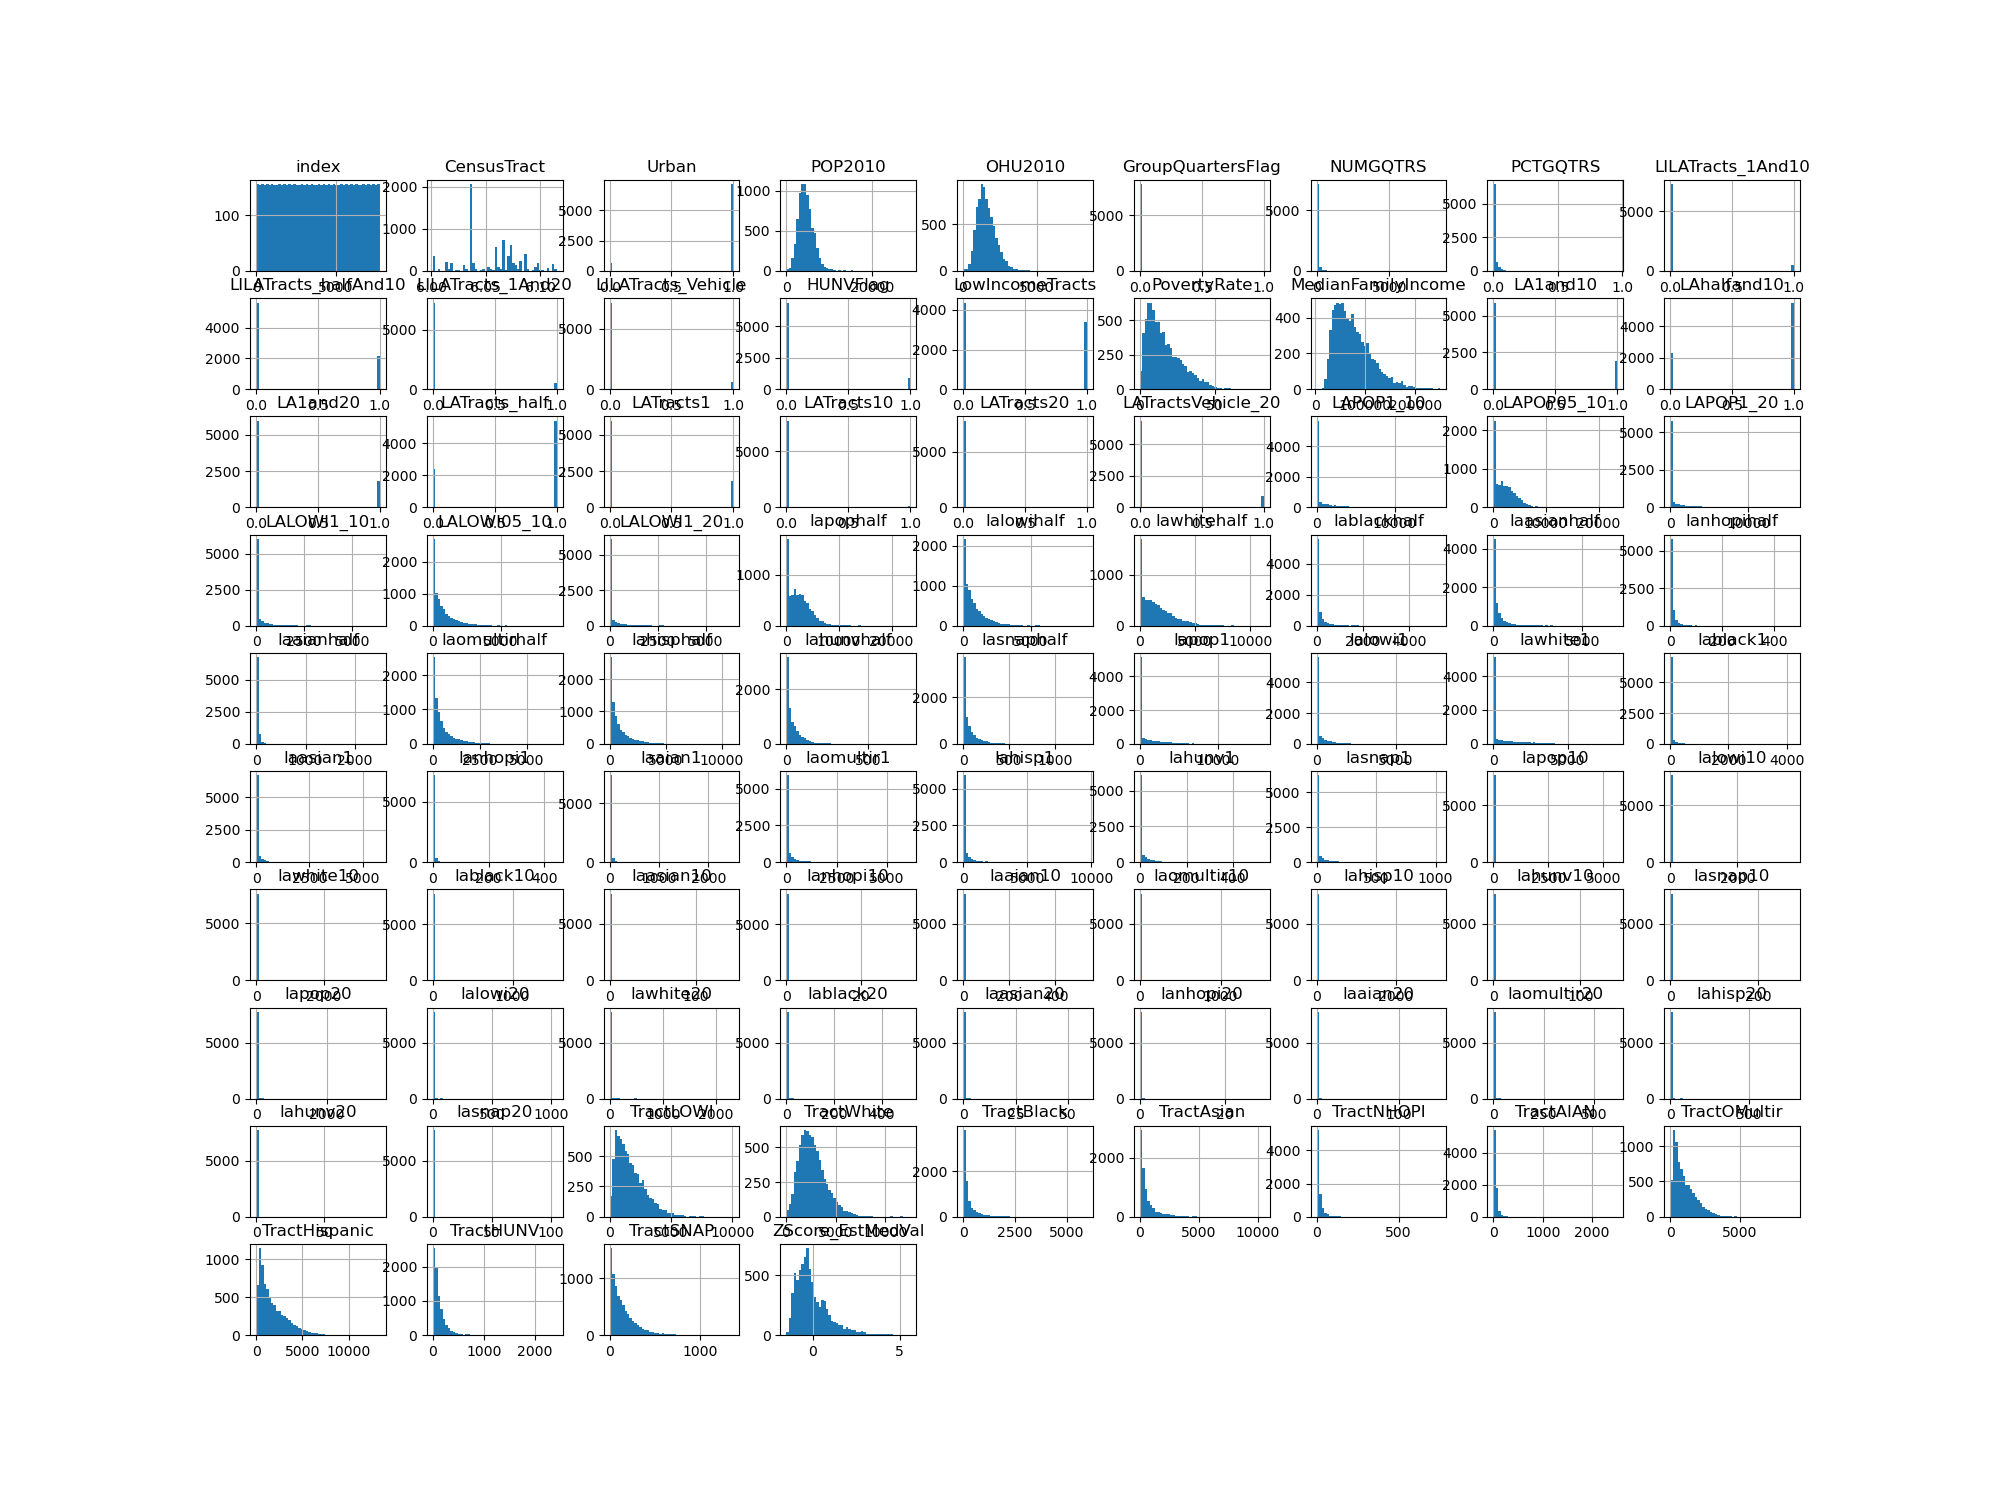

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
new_foodAccess_df.hist(bins=50, figsize=(20,15))
plt.show()


In [7]:
## method1 Simple Statistical linear regression model
import statsmodels.formula.api as sm

In [8]:
# Fitting the OLS on data
model = sm.ols('ZScore_EstMedVal ~ Urban+ POP2010+ OHU2010+ GroupQuartersFlag+ NUMGQTRS+ PCTGQTRS + LILATracts_1And10 + LILATracts_halfAnd10+ LILATracts_1And20+ LILATracts_Vehicle+ HUNVFlag   + LowIncomeTracts+ PovertyRate+ MedianFamilyIncome+ LA1and10+ LAhalfand10+ LA1and20+ LATracts_half + LATracts1+ LATracts10+ LATracts20+ LATractsVehicle_20+ LAPOP1_10+ LAPOP05_10+ LAPOP1_20+ LALOWI1_10+ LALOWI05_10+ LALOWI1_20+  lapophalf+ lalowihalf+ lawhitehalf+ lablackhalf+ laasianhalf+ lanhopihalf+ laaianhalf+ laomultirhalf+ lahisphalf+ lahunvhalf+ lasnaphalf+ lapop1+ lalowi1+ lawhite1+ lablack1+ laasian1+ lanhopi1+ laaian1+ laomultir1+ lahisp1+ lahunv1+ lasnap1+ lapop10+ lalowi10+ lawhite10+ lablack10+ laasian10+ lanhopi10+ laaian10+ laomultir10+ lahisp10+ lahunv10+ lasnap10+ lapop20+ lalowi20+ lawhite20+ lablack20+ laasian20+ lanhopi20+ laaian20+ laomultir20+ lahisp20+ lahunv20+ lasnap20+ TractLOWI+ TractWhite+ TractBlack+ TractAsian+ TractNHOPI+ TractAIAN+ TractOMultir+ TractHispanic+ TractHUNV+ TractSNAP', new_foodAccess_df).fit()
print(model.params)

Intercept           -2.099756
Urban                0.323893
POP2010              0.222099
OHU2010              0.000273
GroupQuartersFlag    0.039725
                       ...   
TractAIAN           -0.224965
TractOMultir        -0.222134
TractHispanic        0.000008
TractHUNV            0.000603
TractSNAP           -0.001154
Length: 83, dtype: float64


In [9]:
print(model.summary2())

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.690     
Dependent Variable:        ZScore_EstMedVal      AIC:                     13024.4033
Date:                      2022-05-27 22:19      BIC:                     13574.1178
No. Observations:          7773                  Log-Likelihood:          -6433.2   
Df Model:                  78                    F-statistic:             223.2     
Df Residuals:              7694                  Prob (F-statistic):      0.00      
R-squared:                 0.694                 Scale:                   0.30963   
------------------------------------------------------------------------------------
                        Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept                -2.0998     0.0597 -35.1570 0.0000      -2.2168     -1.9827
Urban  

In [10]:
##Chose significant values
model2 = sm.ols('ZScore_EstMedVal ~ Urban+  OHU2010+  NUMGQTRS+   LowIncomeTracts+ PovertyRate+ MedianFamilyIncome+  LAPOP1_10+ LAPOP1_20+ LALOWI1_10+ LALOWI1_20+lahunvhalf+  lahunv1+  lalowi10+  TractLOWI+ TractHUNV+ TractSNAP', new_foodAccess_df).fit()
print(model2.params)

Intercept            -2.186805
Urban                 0.164787
OHU2010               0.000008
NUMGQTRS             -0.000003
LowIncomeTracts       0.189825
PovertyRate           0.010965
MedianFamilyIncome    0.000024
LAPOP1_10            -0.000130
LAPOP1_20             0.000036
LALOWI1_10            0.000531
LALOWI1_20           -0.000455
lahunvhalf           -0.000608
lahunv1              -0.000068
lalowi10             -0.000375
TractLOWI             0.000075
TractHUNV             0.001167
TractSNAP            -0.001767
dtype: float64


In [11]:
#stewise regression for chosing related variables & better way using regression model
x_columns=['Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome',
       'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1',
       'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10',
       'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
       'lapophalf', 'lalowihalf', 'lawhitehalf', 'lablackhalf', 'laasianhalf',
       'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf',
       'lahunvhalf', 'lasnaphalf', 'lapop1', 'lalowi1', 'lawhite1', 'lablack1',
       'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 'lahisp1', 'lahunv1',
       'lasnap1', 'lapop10', 'lalowi10', 'lawhite10', 'lablack10', 'laasian10',
       'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10',
       'lasnap10', 'lapop20', 'lalowi20', 'lawhite20', 'lablack20',
       'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20',
       'lahunv20', 'lasnap20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP',]

In [12]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       2.416889
1       1.682202
2       1.541934
3       1.400941
4       0.652844
          ...   
7768   -0.856036
7769   -0.910041
7770   -0.842263
7771   -0.553752
7772   -0.955347
Name: ZScore_EstMedVal, Length: 7773, dtype: float64

In [13]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = new_foodAccess_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              178.7
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:52   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7695   BIC:                                  1.472e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [14]:
# loop through model testing
x_columns.remove("POP2010")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              178.7
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:52   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7695   BIC:                                  1.472e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
x_columns.remove("GroupQuartersFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              181.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:52   Log-Likelihood:                         -7012.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7696   BIC:                                  1.471e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
x_columns.remove("PCTGQTRS")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              183.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.1
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7697   BIC:                                  1.471e+04
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
x_columns.remove("LILATracts_1And10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              185.8
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.418e+04
Df Residuals:                    7698   BIC:                                  1.470e+04
Df Model:                          75                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [18]:
x_columns.remove("LILATracts_1And20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              188.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7699   BIC:                                  1.469e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
x_columns.remove("HUNVFlag")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [20]:
x_columns.remove("LA1and10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [21]:
x_columns.remove("LA1and20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [22]:
x_columns.remove("LAhalfand10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              191.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7013.2
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7700   BIC:                                  1.468e+04
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [23]:
x_columns.remove("LATracts20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              193.5
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7014.5
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7701   BIC:                                  1.467e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [24]:
x_columns.remove("LATractsVehicle_20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              196.3
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7014.6
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7702   BIC:                                  1.467e+04
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [25]:
x_columns.remove("LAPOP1_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              199.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:53   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7703   BIC:                                  1.466e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [26]:
x_columns.remove("LAPOP1_20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              201.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7704   BIC:                                  1.465e+04
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [27]:
x_columns.remove("LALOWI1_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              204.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7015.7
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7705   BIC:                                  1.464e+04
Df Model:                          68                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [28]:
x_columns.remove("LALOWI05_10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              208.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7016.1
No. Observations:                7773   AIC:                                  1.417e+04
Df Residuals:                    7706   BIC:                                  1.463e+04
Df Model:                          67                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [29]:
x_columns.remove("lapophalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              211.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7016.1
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7707   BIC:                                  1.462e+04
Df Model:                          66                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [30]:
x_columns.remove("lalowihalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              214.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7016.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7708   BIC:                                  1.461e+04
Df Model:                          65                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [31]:
x_columns.remove("lanhopihalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              217.8
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7016.3
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7709   BIC:                                  1.461e+04
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [32]:
x_columns.remove("laaianhalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              221.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7017.1
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7710   BIC:                                  1.460e+04
Df Model:                          63                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [33]:
x_columns.remove("lahisphalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              224.8
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7017.6
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7711   BIC:                                  1.459e+04
Df Model:                          62                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [34]:
x_columns.remove("lasnaphalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              228.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7018.8
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7712   BIC:                                  1.458e+04
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [35]:
x_columns.remove("lahunvhalf")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              232.1
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:54   Log-Likelihood:                         -7019.7
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7713   BIC:                                  1.458e+04
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [36]:
x_columns.remove("lapop1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              236.1
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7714   BIC:                                  1.457e+04
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [37]:
x_columns.remove("lalowi1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              240.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.416e+04
Df Residuals:                    7715   BIC:                                  1.456e+04
Df Model:                          58                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [38]:
x_columns.remove("lablack1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              244.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7020.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7716   BIC:                                  1.455e+04
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [39]:
x_columns.remove("laasian1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              248.8
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7020.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7717   BIC:                                  1.454e+04
Df Model:                          56                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [40]:
x_columns.remove("laomultir1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              253.3
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7020.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7718   BIC:                                  1.453e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [41]:
x_columns.remove("lasnap1")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              258.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7021.1
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7719   BIC:                                  1.453e+04
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [42]:
x_columns.remove("lapop10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              262.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7021.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7720   BIC:                                  1.452e+04
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [43]:
x_columns.remove("lalowi10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              267.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7022.2
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7721   BIC:                                  1.451e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [44]:
x_columns.remove("lawhite10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              273.1
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7022.7
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7722   BIC:                                  1.450e+04
Df Model:                          51                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [45]:
x_columns.remove("lablack10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              278.5
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7023.4
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7723   BIC:                                  1.449e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [46]:
x_columns.remove("laasian10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              284.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7023.9
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7724   BIC:                                  1.449e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [47]:
x_columns.remove("lanhopi10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              290.0
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:55   Log-Likelihood:                         -7025.0
No. Observations:                7773   AIC:                                  1.415e+04
Df Residuals:                    7725   BIC:                                  1.448e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [48]:
x_columns.remove("laaian10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              296.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7025.1
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7726   BIC:                                  1.447e+04
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [49]:
x_columns.remove("laomultir10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              302.6
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7026.0
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7727   BIC:                                  1.446e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [50]:
x_columns.remove("lahisp10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              309.3
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7728   BIC:                                  1.446e+04
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [51]:
x_columns.remove("lasnap10")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              316.4
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7729   BIC:                                  1.445e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [52]:
x_columns.remove("lapop20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              323.8
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7730   BIC:                                  1.444e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [53]:
x_columns.remove("lalowi20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              331.5
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7026.2
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7731   BIC:                                  1.443e+04
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [54]:
x_columns.remove("lawhite20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              339.5
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7027.3
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7732   BIC:                                  1.442e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [55]:
x_columns.remove("lablack20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              347.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7028.1
No. Observations:                7773   AIC:                                  1.414e+04
Df Residuals:                    7733   BIC:                                  1.441e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [56]:
x_columns.remove("laasian20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              356.9
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7028.4
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7734   BIC:                                  1.441e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [57]:
x_columns.remove("lanhopi20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              366.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7028.9
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7735   BIC:                                  1.440e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [58]:
x_columns.remove("laomultir20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              376.2
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7028.9
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7736   BIC:                                  1.439e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [59]:
x_columns.remove("lahisp20")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              386.6
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7029.5
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7737   BIC:                                  1.438e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [60]:
x_columns.remove("TractOMultir")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       ZScore_EstMedVal   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              397.7
Date:                Fri, 27 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -7029.7
No. Observations:                7773   AIC:                                  1.413e+04
Df Residuals:                    7738   BIC:                                  1.437e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [61]:
clean_foodAccess_df=new_foodAccess_df.filter(['Urban', 'POP2010', 'OHU2010','NUMGQTRS', 'LILATracts_halfAnd10', 'LILATracts_Vehicle', 
       'LowIncomeTracts',  'PovertyRate', 'MedianFamilyIncome','LATracts_half', 'LATracts1', 'LATracts10', 
       'LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'lahunv1','lahunv10', 'laasian20', 'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'], axis=1)
clean_foodAccess_df

,Urban,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LATracts_half,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,2,0,0,0,5.0,230139,1,...,173,2161,142,456,9,4,117,0,0,2.416889
1,1,1974,856,70,0,0,0,4.0,181016,0,...,161,1659,33,147,0,4,151,57,6,1.682202
2,1,4865,2418,40,0,0,0,8.6,136250,0,...,781,3468,518,423,5,17,399,354,34,1.541934
3,1,3703,1779,33,0,0,0,7.2,109861,0,...,672,2628,456,278,6,14,332,159,9,1.400941
4,1,3517,1578,126,0,0,0,15.1,102083,1,...,924,1905,955,209,5,27,340,258,72,0.652844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,0,10879,3320,6,0,0,0,7.9,66913,0,...,3749,7103,565,856,103,157,2759,124,81,-0.856036
7769,0,4233,1492,4,0,0,0,17.6,66416,0,...,1285,3289,44,213,5,77,713,118,227,-0.910041
7770,0,2783,968,12,0,0,0,17.7,57237,0,...,1421,1997,31,297,2,75,476,41,140,-0.842263
7771,0,7357,2802,0,0,0,0,11.6,73351,0,...,1889,6179,57,181,9,156,916,56,261,-0.553752


<IPython.core.display.Javascript object>


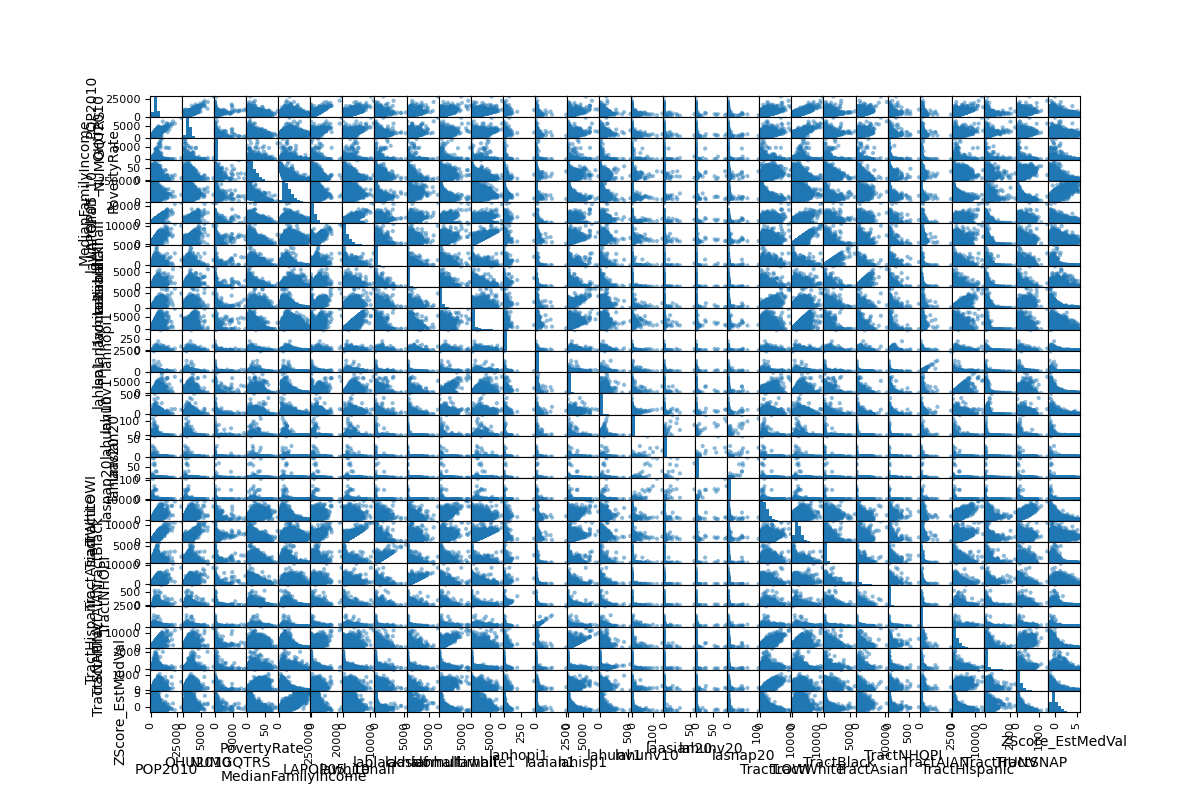

array([[<AxesSubplot:xlabel='POP2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='OHU2010', ylabel='POP2010'>,
        <AxesSubplot:xlabel='NUMGQTRS', ylabel='POP2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='POP2010'>,
        <AxesSubplot:xlabel='MedianFamilyIncome', ylabel='POP2010'>,
        <AxesSubplot:xlabel='LAPOP05_10', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lawhitehalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lablackhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laasianhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laomultirhalf', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lawhite1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lanhopi1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laaian1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahisp1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahunv1', ylabel='POP2010'>,
        <AxesSubplot:xlabel='lahunv10', ylabel='POP2010'>,
        <AxesSubplot:xlabel='laa

In [62]:
from pandas.plotting import scatter_matrix
colist=clean_foodAccess_df.filter(['POP2010', 'OHU2010','NUMGQTRS','PovertyRate', 'MedianFamilyIncome', 
       'LAPOP05_10', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'laomultirhalf', 'lawhite1',  'lanhopi1', 
        'laaian1',  'lahisp1', 'lahunv1','lahunv10', 'laasian20', 'lahunv20', 'lasnap20', 'TractLOWI', 
        'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(clean_foodAccess_df[attributes], figsize=(12, 8))

In [63]:
colist2=clean_foodAccess_df.filter(['Urban','LILATracts_halfAnd10', 'LILATracts_Vehicle', 'LowIncomeTracts','LATracts_half', 'LATracts1', 'LATracts10','ZScore_EstMedVal'], axis=1)
attributes = list(colist2)

plt.show()

In [108]:
import os  
os.makedirs('Resources/', exist_ok=True)  
clean_foodAccess_df.to_csv('Resources/FoodAccess2015HousingPrice_All.csv', index=False)  

In [66]:
#Method2 Machine learning: linear regression
##create variables
X=clean_foodAccess_df.drop(columns=["ZScore_EstMedVal"], axis=1)
X

,Urban,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LATracts_half,...,lasnap20,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractHispanic,TractHUNV,TractSNAP
0,1,2937,1314,2,0,0,0,5.0,230139,1,...,0.0,173,2161,142,456,9,4,117,0,0
1,1,1974,856,70,0,0,0,4.0,181016,0,...,0.0,161,1659,33,147,0,4,151,57,6
2,1,4865,2418,40,0,0,0,8.6,136250,0,...,0.0,781,3468,518,423,5,17,399,354,34
3,1,3703,1779,33,0,0,0,7.2,109861,0,...,0.0,672,2628,456,278,6,14,332,159,9
4,1,3517,1578,126,0,0,0,15.1,102083,1,...,0.0,924,1905,955,209,5,27,340,258,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,0,10879,3320,6,0,0,0,7.9,66913,0,...,0.0,3749,7103,565,856,103,157,2759,124,81
7769,0,4233,1492,4,0,0,0,17.6,66416,0,...,0.0,1285,3289,44,213,5,77,713,118,227
7770,0,2783,968,12,0,0,0,17.7,57237,0,...,0.0,1421,1997,31,297,2,75,476,41,140
7771,0,7357,2802,0,0,0,0,11.6,73351,0,...,0.0,1889,6179,57,181,9,156,916,56,261


In [67]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       2.416889
1       1.682202
2       1.541934
3       1.400941
4       0.652844
          ...   
7768   -0.856036
7769   -0.910041
7770   -0.842263
7771   -0.553752
7772   -0.955347
Name: ZScore_EstMedVal, Length: 7773, dtype: float64

In [68]:
X.describe()

,Urban,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LATracts_half,...,lasnap20,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractHispanic,TractHUNV,TractSNAP
count,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,...,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000,7773.000000
mean,0.916120,4685.479866,1587.826836,75.423517,0.274797,0.076418,0.437540,16.371800,75744.695742,0.695098,...,0.091715,1709.046186,2700.815129,283.323813,612.251126,18.228355,45.747845,1768.612762,120.337450,139.239676
std,0.277226,1905.032959,658.272532,339.804011,0.446441,0.265683,0.496115,11.605238,37474.746613,0.460395,...,2.037351,1201.752601,1385.231841,445.507347,814.950080,31.586641,60.092858,1540.809106,144.748427,139.256280
min,0.000000,71.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,...,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,1.000000,3407.000000,1124.000000,1.000000,0.000000,0.000000,0.000000,7.300000,46921.000000,0.000000,...,0.000000,779.000000,1699.000000,53.000000,124.000000,4.000000,19.000000,575.000000,37.000000,37.000000
50%,1.000000,4450.000000,1492.000000,12.000000,0.000000,0.000000,0.000000,13.400000,68393.000000,1.000000,...,0.000000,1438.000000,2498.000000,123.000000,316.000000,9.000000,34.000000,1293.000000,80.000000,98.000000
75%,1.000000,5682.000000,1957.000000,49.000000,1.000000,0.000000,1.000000,23.100000,97188.000000,1.000000,...,0.000000,2378.000000,3454.000000,307.000000,739.000000,21.000000,57.000000,2568.000000,156.000000,197.000000
max,1.000000,28960.000000,8382.000000,8524.000000,1.000000,1.000000,1.000000,82.700000,250000.000000,1.000000,...,105.118372,10068.000000,12514.000000,5971.000000,10485.000000,755.000000,2506.000000,13341.000000,2428.000000,1368.000000


In [69]:
X=pd.get_dummies(X, columns=["Urban","LILATracts_halfAnd10","LILATracts_Vehicle","LowIncomeTracts","LATracts_half",'LATracts1', 'LATracts10'])
X

,POP2010,OHU2010,NUMGQTRS,PovertyRate,MedianFamilyIncome,LAPOP05_10,lawhitehalf,lablackhalf,laasianhalf,laomultirhalf,...,LILATracts_Vehicle_0,LILATracts_Vehicle_1,LowIncomeTracts_0,LowIncomeTracts_1,LATracts_half_0,LATracts_half_1,LATracts1_0,LATracts1_1,LATracts10_0,LATracts10_1
0,2937,1314,2,5.0,230139,2898.254926,2128.591735,140.812215,452.594207,163.256779,...,1,0,1,0,0,1,0,1,1,0
1,1974,856,70,4.0,181016,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,1,0,1,0,1,0,1,0
2,4865,2418,40,8.6,136250,352.947122,108.691007,193.865516,16.545298,28.501166,...,1,0,1,0,1,0,1,0,1,0
3,3703,1779,33,7.2,109861,79.819428,56.753659,12.788799,4.186977,4.851937,...,1,0,1,0,1,0,1,0,1,0
4,3517,1578,126,15.1,102083,889.003919,426.768804,299.961038,40.141048,114.535565,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,10879,3320,6,7.9,66913,0.000000,7102.999973,565.000000,855.999994,2094.999984,...,1,0,1,0,1,0,1,0,1,0
7769,4233,1492,4,17.6,66416,0.000000,2049.090756,38.796488,175.912747,360.806333,...,1,0,1,0,1,0,1,0,1,0
7770,2783,968,12,17.7,57237,0.000000,1996.999991,31.000000,297.000006,380.999997,...,1,0,1,0,1,0,1,0,1,0
7771,7357,2802,0,11.6,73351,0.000000,6051.896936,53.867484,175.785883,769.645501,...,1,0,1,0,1,0,1,0,1,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
print(len(X_train), "train +", len(X_test), "test")


6218 train + 1555 test


In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(X_test)

In [74]:
df_lin_reg = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_lin_reg

,Real Values,Predicted Values
6367,-0.892281,-0.630500
1957,0.101195,0.530851
4634,-1.125699,-0.705926
6203,1.200144,1.345678
6212,1.219354,0.629556
...,...,...
2016,-0.105402,-0.040554
5638,0.776802,1.439377
1312,-0.159044,-0.465443
6501,0.561507,0.694839


In [75]:
#Calculating error metric
rmse_linreg = np.sqrt(mean_squared_error(y_test,y_pred))
r2_linreg = r2_score(y_test,y_pred)
print('LinearRegression Based RMSE is  ' + str(rmse_linreg))
print('LinearRegression Based r2 is  ' +str(r2_linreg))

LinearRegression Based RMSE is  0.5932726790226527
LinearRegression Based r2 is  0.6447057845892339


In [76]:
##method3 polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Scaling the data.
X_scaler = scaler.fit_transform(X)


In [78]:
print(X_scaler.shape)
print(type(X_scaler))

(7773, 42)
<class 'numpy.ndarray'>


In [79]:
print(np.mean(X_scaler, axis=0))

[ 2.26700886e-16  5.85034544e-17  2.55952613e-17 -2.92517272e-17
 -8.04422498e-17 -1.09693977e-16 -1.46258636e-17  2.74234942e-17
 -5.85034544e-17  8.04422498e-17  5.85034544e-17 -7.31293180e-18
  3.47364260e-17 -4.38775908e-17 -3.65646590e-17  1.82823295e-17
 -5.48469885e-18  5.48469885e-18 -2.74234942e-17  2.01105624e-17
 -5.85034544e-17  7.31293180e-18 -1.82823295e-17  0.00000000e+00
  1.82823295e-17 -2.55952613e-17  4.38775908e-17  3.29081931e-17
  7.31293180e-18  5.85034544e-17  1.17006909e-16 -5.48469885e-17
  1.38945704e-16 -7.31293180e-18 -1.31632772e-16  1.31632772e-16
 -8.04422498e-17 -5.11905226e-17  1.46258636e-17 -1.46258636e-17
  2.92517272e-16  1.82823295e-17]


In [80]:
print(np.std(X_scaler, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [81]:
pca=PCA(n_components=15, random_state=1000)

In [82]:
X_pca=pca.fit_transform(X_scaler)
print(X_pca.shape)
print(type(X_pca))

(7773, 15)
<class 'numpy.ndarray'>


In [83]:
print("explian the variance explained by principal components: ")
pca.explained_variance_ratio_*100

explian the variance explained by principal components: 


array([17.38282849, 16.01124705, 12.29923172,  7.65815858,  6.29637547,
        4.77762765,  4.01925451,  3.78518638,  3.23163696,  3.1217877 ,
        2.91199535,  2.47473644,  2.37099773,  1.9764733 ,  1.51375664])

In [84]:
lin_regpoly = LinearRegression()
lin_regpoly.fit(X_pca, y)

LinearRegression()

In [85]:
y_pred = lin_regpoly.predict(X_pca)

In [86]:
df_polynom = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_polynom

,Real Values,Predicted Values
0,2.416889,0.920023
1,1.682202,0.764988
2,1.541934,0.859807
3,1.400941,0.644342
4,0.652844,0.507077
...,...,...
7768,-0.856036,-0.982063
7769,-0.910041,0.102674
7770,-0.842263,-0.034687
7771,-0.553752,-0.091791


In [87]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))
mape = np.mean(np.abs((y - y_pred) / np.abs(y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.5308050552318803
Mean Squared Error (MSE): 0.5471205616520165
Root Mean Squared Error (RMSE): 0.7396759842336484
Mean Absolute Percentage Error (MAPE): 380.86
Accuracy: -280.86


In [88]:
#Calculating error metric
rmse_regpoly = np.sqrt(mean_squared_error(y,y_pred))
r2_regpoly = r2_score(y,y_pred)
print('PolynomialRegression RMSE is  ' + str(rmse_regpoly))
print('PolynomialRegression r2 is  ' +str(r2_regpoly))

PolynomialRegression RMSE is  0.7396759842336484
PolynomialRegression r2 is  0.4528794383479836


In [89]:
#method4:  Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [90]:
y_pred=tree_reg.predict(X)

In [91]:
df_tree = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_tree

,Real Values,Predicted Values
0,2.416889,2.340374
1,1.682202,2.340374
2,1.541934,0.837071
3,1.400941,0.837071
4,0.652844,0.837071
...,...,...
7768,-0.856036,-0.531185
7769,-0.910041,-0.531185
7770,-0.842263,-0.531185
7771,-0.553752,0.069658


In [103]:
#Calculating error metric
rmse_treereg = np.sqrt(mean_squared_error(y,y_pred))
r2_tree_reg = r2_score(y,y_pred)
print('DecisionTree RMSE is  ' + str(rmse_treereg))
print('Decision Tree r2 is  ' +str(r2_tree_reg))

DecisionTree RMSE is  0.6592225627875407
Decision Tree r2 is  0.565425612711827


In [93]:
#Method5: RandomForest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [96]:
# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 

In [97]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [98]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [99]:
from sklearn import metrics

In [100]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
mape = np.mean(np.abs((y_test - predictions) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.34991632273508333
Mean Squared Error (MSE): 0.25978672848053436
Root Mean Squared Error (RMSE): 0.5096927785249996
Mean Absolute Percentage Error (MAPE): 194.03
Accuracy: -94.03


In [101]:
#Calculating error metric
rmse_forest = np.sqrt(mean_squared_error(y_test,predictions))
r2_forest = r2_score(y_test,predictions)
print('RandomForest RMSE is  ' + str(rmse_forest))
print('RandomForest r2 is  ' +str(r2_forest))

RandomForest RMSE is  0.5096927785249996
RandomForest r2 is  0.7497664159741778


In [107]:
#create dataFrame for comparision of models
com={"Model Name":['Linear Regression','Polynomial Regression', 'Decision Tree', 'Random Forest'],
     "RMSE":[rmse_linreg,rmse_regpoly,rmse_treereg,rmse_forest],
     "RSquare":[r2_linreg,r2_regpoly,r2_tree_reg,r2_forest]
    
}
df_com=pd.DataFrame(com)
df_com


,Model Name,RMSE,RSquare
0,Linear Regression,0.593273,0.644706
1,Polynomial Regression,0.739676,0.452879
2,Decision Tree,0.659223,0.565426
3,Random Forest,0.509693,0.749766
